In [2]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [7]:
df = pd.read_csv('dataset.csv')

X = np.array(df[['f1', 'f2', 'f3', 'f4']])
X = np.array(df[['f1', 'f2']])
y = df['value']

# kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
gp = GaussianProcessRegressor( n_restarts_optimizer=15)


gp.fit(X, y)
#x1x2 = np.array(list(product(x1, x2)))



GaussianProcessRegressor(n_restarts_optimizer=15)

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


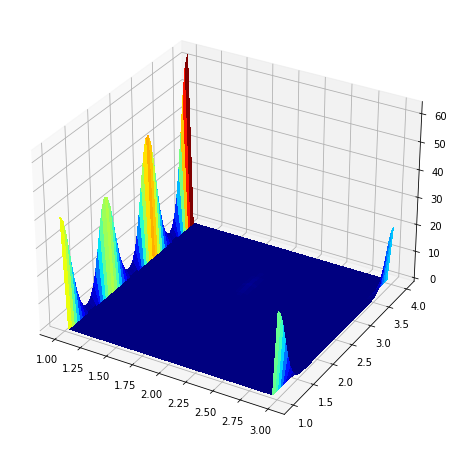

In [8]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


X = np.array(df[['f1', 'f2']])
y = df['value']


# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111)
#ax.pcolormesh(X0p, X1p, Zp)
ax = fig.add_subplot(111, projection='3d')            
surf = ax.plot_surface(X0p, X1p, Zp, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

plt.show()

In [9]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


X = np.array(df[['f1', 'f2', 'f3', 'f4']])
y = df['value']


# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x3 = np.linspace(X[:,2].min(), X[:,2].max()) #p
x4 = np.linspace(X[:,3].min(), X[:,3].max()) #q

x = (np.array([x1, x2, x3, x4])).T

#kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor( n_restarts_optimizer=15)

gp.fit(X, y)

x1x2x3x4 = np.array(list(product(x1, x2, x3, x4)))
y_pred, MSE = gp.predict(x1x2x3x4, return_std=True)

# X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
# Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

# fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111)
#ax.pcolormesh(X0p, X1p, Zp)
# ax = fig.add_subplot(111, projection='3d')            
# surf = ax.plot_surface(X0p, X1p, Zp, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

# plt.show()

In [10]:
gp.predict(np.array([[1, 2, 4, 5]]), return_std=True)[0][0]



9.074152053285722

In [3]:
df = pd.read_csv('dataset_sejong.csv')

df = df[['A11', 'A12', 'A21', 'A22', 'D1', 'D2', 'vonMises']]
df = df.dropna()
df = df.reset_index()
df

,index,A11,A12,A21,A22,D1,D2,vonMises
0,0,0,0,0,0,40,68,262.887
1,1,40,0,0,0,40,68,288.555
2,2,0,40,0,0,40,68,267.592
3,3,0,0,-40,0,40,68,350.837
4,4,0,0,0,-40,40,68,233.485
5,5,0,0,-89,0,40,68,361.570
6,6,0,0,-89,0,20,50,242.771
7,7,40,40,0,0,40,68,281.390
8,8,40,0,-40,0,40,68,371.372
9,9,40,0,0,-40,40,68,248.533


In [8]:
df['D1'] = df['D1'].apply(lambda x: int(x))
df['D2'] = df['D2'].apply(lambda x: int(x))

In [ ]:
X = np.array(df[['A11', 'A12', 'A21', 'A22', 'D1', 'D2']])
y = df['vonMises']


# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x3 = np.linspace(X[:,2].min(), X[:,2].max()) #p
x4 = np.linspace(X[:,3].min(), X[:,3].max()) #q
x5 = np.linspace(X[:,4].min(), X[:,4].max()) #p
x6 = np.linspace(X[:,5].min(), X[:,5].max()) #q

x = (np.array([x1, x2, x3, x4, x5, x6])).T

#kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor( n_restarts_optimizer=15)

gp.fit(X, y)

x_inputs = np.array(list(product(x1, x2, x3, x4, x5, x6)))
y_pred, MSE = gp.predict(x_inputs, return_std=True)

# X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
# Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

# fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111)
#ax.pcolormesh(X0p, X1p, Zp)
# ax = fig.add_subplot(111, projection='3d')            
# surf = ax.plot_surface(X0p, X1p, Zp, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

# plt.show()

In [ ]:
gp.predict(np.array([[0, 40, 0, -40, 40, 68]]), return_std=True)[0][0]